In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpi
%matplotlib notebook

import skimage as sk
import numpy as np
from scipy.ndimage import gaussian_filter

epsilon = 1e-6

<IPython.core.display.Javascript object>


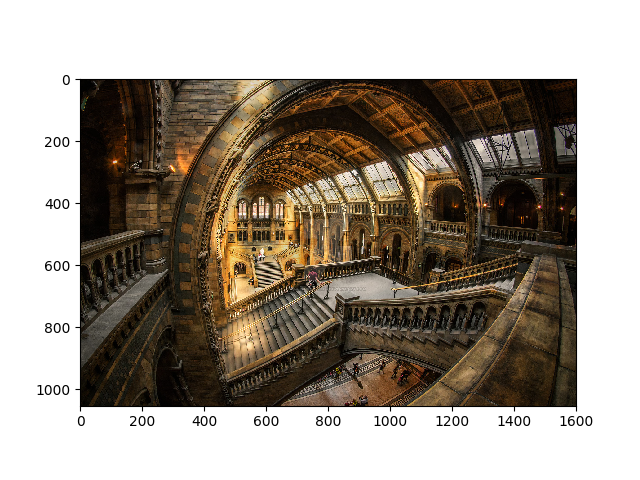

In [24]:
im = mpi.imread('./image1.jpg').astype(float) / 255.0
plt.imshow(im)

In [25]:
noise = np.random.randn(*im.shape)
noise.shape
np.max(im)

1.0

Add signal-dependent noise

In [26]:
b1, b2 = 0.01, 1e-4
sig_noise = noise * np.sqrt(b1 * im + b2)

noisy_im = sig_noise + im

<IPython.core.display.Javascript object>


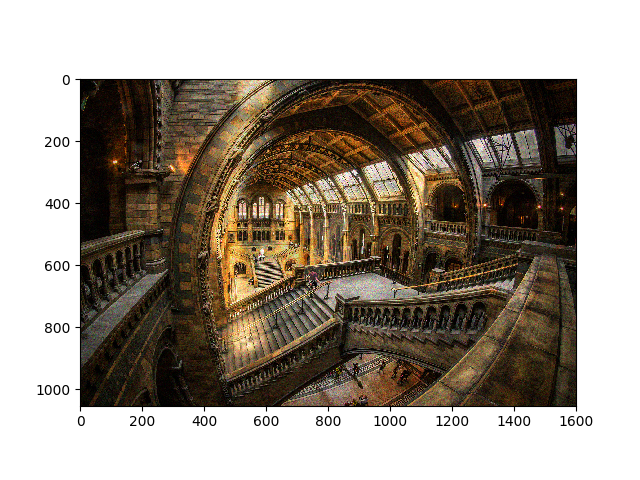

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [27]:
plt.imshow(noisy_im)

Test out Gaussian Denoising and the PSNR and then look at results from DnCNN

<IPython.core.display.Javascript object>


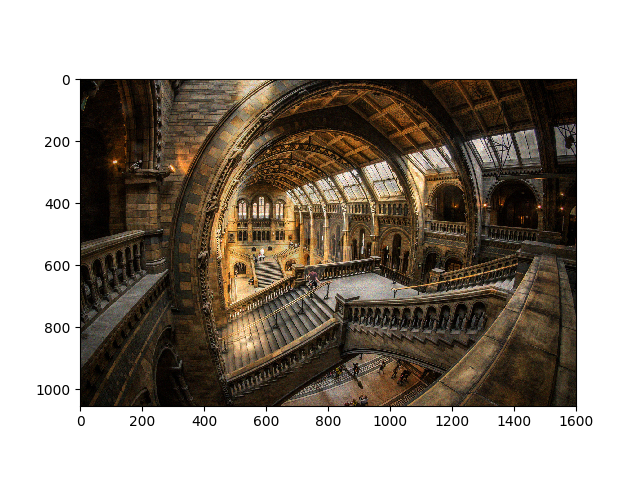

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [28]:
gauss_denoised = gaussian_filter(noisy_im,sigma=0.5)
plt.imshow(gauss_denoised)

calculate pixel-wise PSNR

In [33]:
def pix_psnr(im1, im2):
    return 10 * np.log10(1/(epsilon + np.power((im1 - im2), 2)))

def normalize(im):
    imax = np.max(im)
    imin = np.min(im)
    return (im - imin)/(imax - imin)

def show_psnr_image_pair(psnr_im, im):
    fig, axes = plt.subplots(ncols=2,nrows=1, constrained_layout=True, sharex=True, sharey=True)
    fig.suptitle("Image Comparison")

    axes[0].set_title("psnr map")
    axes[0].imshow(normalize(psnr_im))

    axes[1].set_title("Original Image")
    axes[1].imshow(normalize(im))

pixelwise_psnr = pix_psnr(im, noisy_im)

<IPython.core.display.Javascript object>


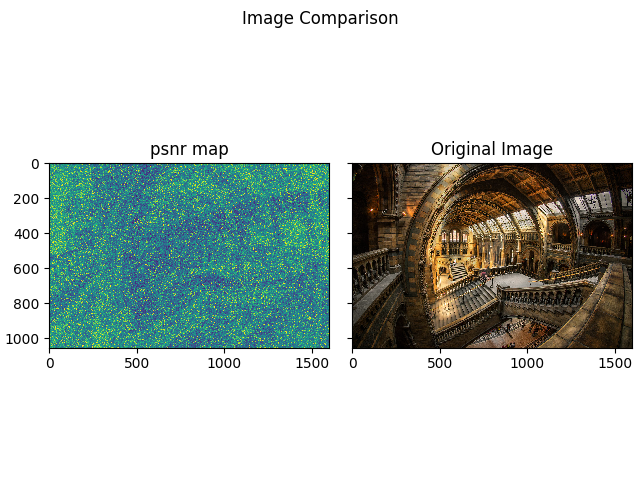

In [35]:
show_psnr_image_pair(pixelwise_psnr[:,:,1], im)